# Knn-Classification 

## Importing the Libraries and the Data

In [38]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


In [39]:
df = pd.read_csv('HIGGS_8K.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,0.0,1.630428,0.404143,0.401026,2.722409,0.355644,1.362199,0.015818,-1.174111,0.000000,...,0.387635,1.596321,1.550981,0.859235,0.827233,0.995416,0.764766,0.520597,0.850413,0.929865
2,1.0,0.326305,-0.797735,0.223471,1.248234,-1.427857,0.923767,-0.278280,-0.470052,0.000000,...,-0.426866,1.153501,0.000000,0.887944,0.924601,0.987189,0.854094,0.385013,0.789912,0.724627
3,1.0,1.381170,0.521993,0.574698,0.357347,0.037136,0.413057,-0.607036,-1.308270,0.000000,...,0.567525,-1.475778,0.000000,0.936186,1.107217,0.983808,0.693327,0.562045,0.825387,0.846233
4,1.0,0.304161,-0.736375,0.686225,0.477172,-1.274736,0.907003,0.324770,-0.463954,2.173076,...,0.904818,1.165154,0.000000,1.181790,1.033701,0.993943,0.648399,0.936097,0.732592,0.661779


## Checking,cleaning and selecting the Data

In [41]:
# Columns that are having floats 
for col in df.columns:
    try:
        df[col].astype(float)
    except ValueError:
        print(f"Problem in the Column: {col}")


Problem in the Column: 17


In [42]:
# The problematic values
df[df.iloc[:, 17].str.contains(r"[a-zA-Z]", na=False)].iloc[:, 17].head(10)


0    0.000000000000000000e+00.1
Name: 17, dtype: object

In [43]:
# After locating the issue, we fix it 
print(f'String value: {df.iloc[0,17]} (type: {type(df.iloc[0, 17])})')
df.iloc[:, 17] = pd.to_numeric(df.iloc[:, 17], errors='coerce').fillna(0) 
print(f'Fixed value: {df.iloc[0, 17]} (type: {type(df.iloc[0, 17])})')

String value: 0.000000000000000000e+00.1 (type: <class 'str'>)
Fixed value: 0.0 (type: <class 'float'>)


In [44]:
classification=df.iloc[:,0]
low_level=df.iloc[:,1:22]
high_level=df.iloc[:,22:]

In [45]:
low_level

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,1.374992,...,0.930349,1.107436,1.138904,-1.578198,-1.046985,0.0,0.657930,-0.010455,-0.045767,3.101961
1,1.630428,0.404143,0.401026,2.722409,0.355644,1.362199,0.015818,-1.174111,0.000000,1.002695,...,-1.466066,0.000000,0.782744,-0.882768,1.008969,0.0,1.536386,0.387635,1.596321,1.550981
2,0.326305,-0.797735,0.223471,1.248234,-1.427857,0.923767,-0.278280,-0.470052,0.000000,0.894418,...,-0.809703,0.000000,1.205289,0.352439,0.626202,2.548224,1.626933,-0.426866,1.153501,0.000000
3,1.381170,0.521993,0.574698,0.357347,0.037136,0.413057,-0.607036,-1.308270,0.000000,0.655957,...,-0.454609,2.214872,1.027034,-1.158574,0.533561,0.0,1.809489,0.567525,-1.475778,0.000000
4,0.304161,-0.736375,0.686225,0.477172,-1.274736,0.907003,0.324770,-0.463954,2.173076,0.468865,...,-0.168871,0.000000,0.618187,2.103758,1.222542,0.0,1.093142,0.904818,1.165154,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7996,0.835437,0.087603,-0.254367,0.565305,0.647809,0.488175,1.169436,1.527465,0.000000,0.728604,...,-1.485485,0.000000,0.876702,-0.268350,0.324426,2.548224,0.904744,0.632485,-0.704450,1.550981
7997,0.817685,-0.189004,-1.441773,0.259808,-0.360375,1.600286,1.249645,-0.146851,2.173076,1.167629,...,1.304859,0.000000,1.066373,1.257226,-0.844507,2.548224,1.017442,-0.765825,1.250610,0.000000
7998,0.425313,0.888205,0.363851,0.573086,1.279933,1.639952,-1.225930,0.082208,0.000000,0.530809,...,-0.866295,0.000000,1.190186,0.092108,0.726054,2.548224,0.717564,1.210464,-0.117351,0.000000
7999,1.359575,-1.438606,-0.095677,0.524665,0.918297,1.181000,0.935742,-1.345968,1.086538,1.438573,...,0.664586,0.000000,0.927632,0.642808,0.135261,0.0,1.067827,-0.107062,-1.701072,0.000000


# Low Level Calculation

Confusion matrix for the low level (n_neighbors=1):
[[365 406]
 [353 477]]
Accuracy score is: 0.5259212991880075


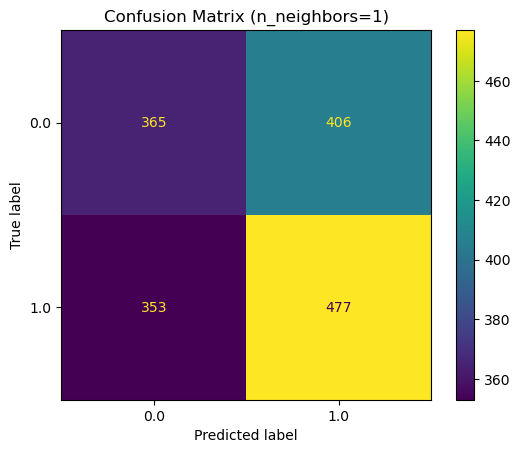

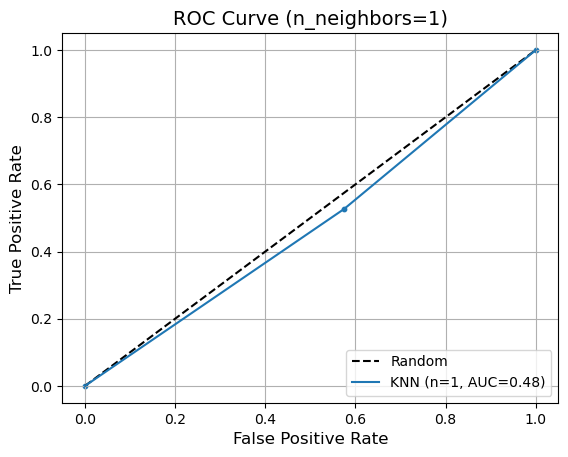

Confusion matrix for the low level (n_neighbors=5):
[[374 397]
 [307 523]]
Accuracy score is: 0.5602748282323547


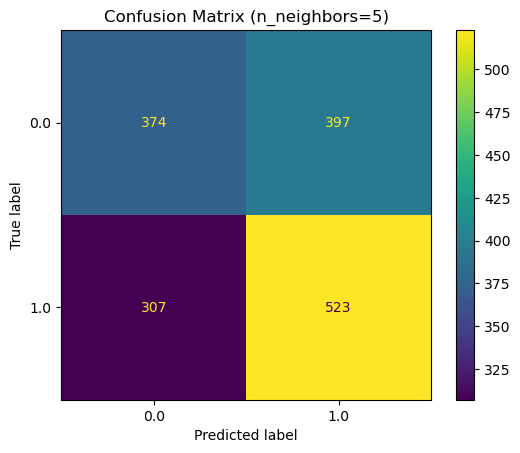

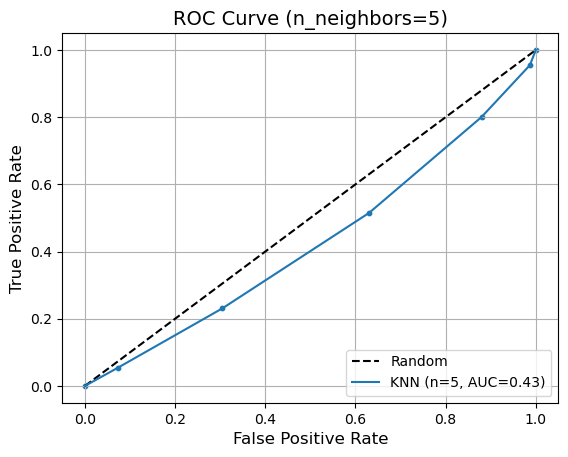

Confusion matrix for the low level (n_neighbors=10):
[[451 320]
 [363 467]]
Accuracy score is: 0.5733916302311055


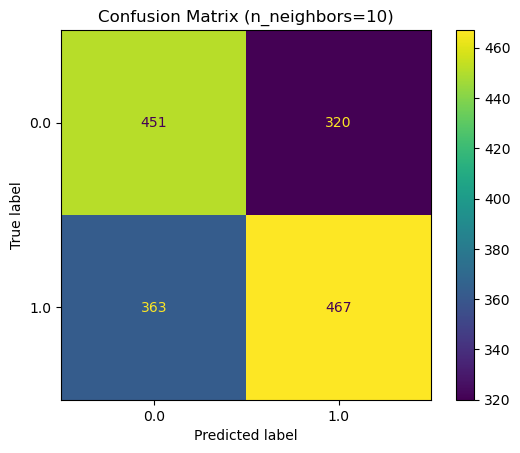

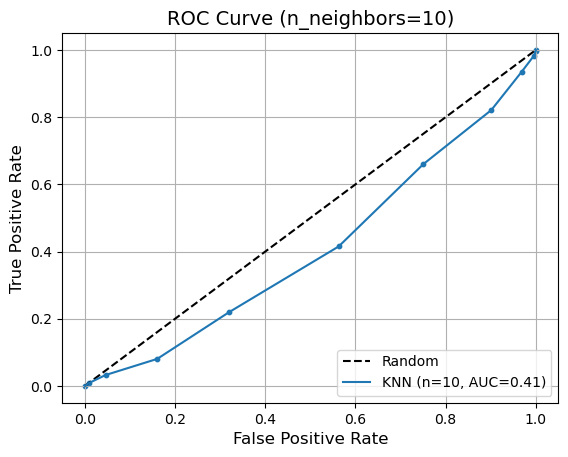

Confusion matrix for the low level (n_neighbors=20):
[[390 381]
 [295 535]]
Accuracy score is: 0.5777638975640225


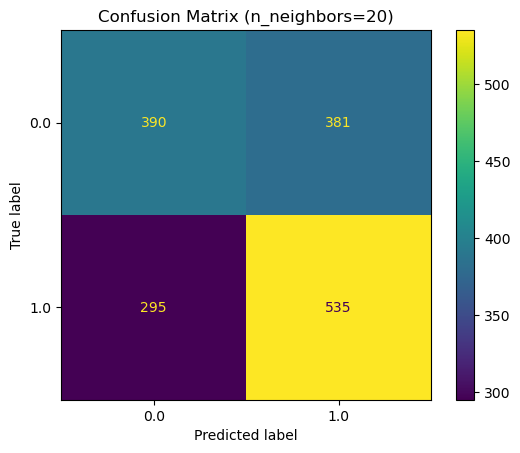

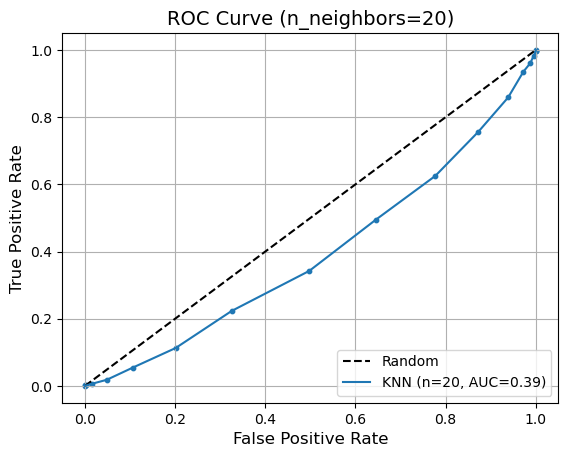

Confusion matrix for the low level (n_neighbors=50):
[[334 437]
 [209 621]]
Accuracy score is: 0.5965021861336665


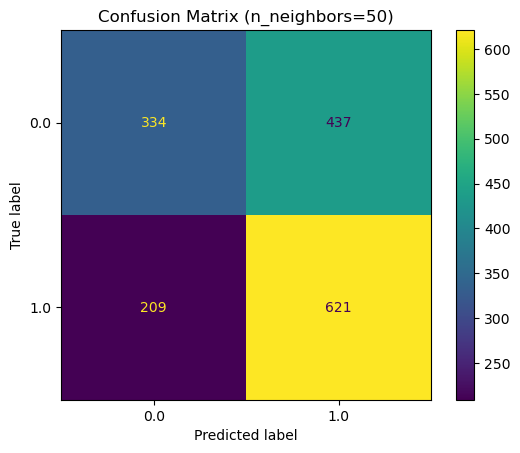

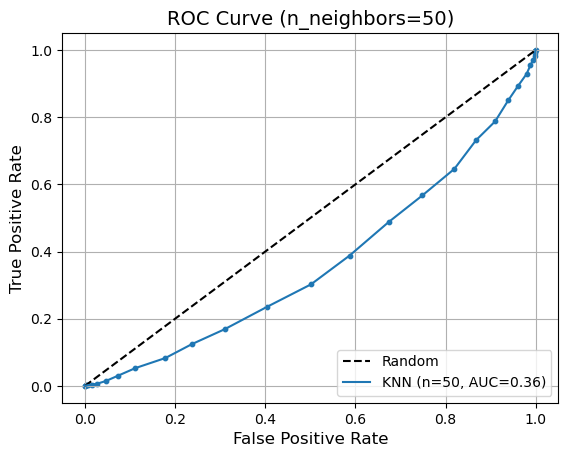

Confusion matrix for the low level (n_neighbors=100):
[[259 512]
 [174 656]]
Accuracy score is: 0.5715178013741412


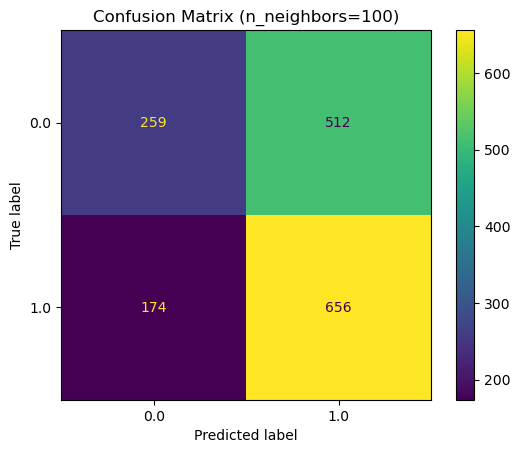

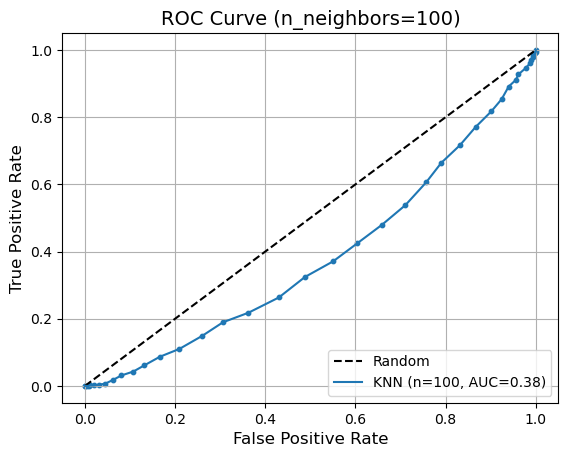

In [47]:

low_level_train, low_level_test, classification_train, classification_test = train_test_split(
    low_level, classification, test_size=0.20, random_state=42)   #splitting the data

    
scaler = StandardScaler()   #scaling the features
low_level_train_scaled = scaler.fit_transform(low_level_train)
low_level_test_scaled = scaler.transform(low_level_test)

n_neighbors = [1, 5, 10, 20, 50, 100]

for n in n_neighbors:
    
    classifier = KNeighborsClassifier(n_neighbors=n)
    classifier.fit(low_level_train_scaled, classification_train)

    low_level_test_pred = classifier.predict(low_level_test_scaled) #predicts and evaluates
    conf_matr = confusion_matrix(classification_test, low_level_test_pred)
    print(f'Confusion matrix for the low level (n_neighbors={n}):\n{conf_matr}')
    print(f'Accuracy score is: {accuracy_score(classification_test, low_level_test_pred)}')
    
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matr, display_labels=classifier.classes_)
    disp.plot()
    plt.title(f'Confusion Matrix (n_neighbors={n})')
    plt.show()

    # plotting the roc curve
    # Convert classification test to binary labels (0 and 1)
    y_true = pd.factorize(classification_test)[0]

    y_pred_prob_knn = classifier.predict_proba(low_level_test_scaled)

    
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob_knn[:, 1])
    auc_score = roc_auc_score(y_true, y_pred_prob_knn[:, 1])

    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.plot(fpr, tpr, label=f'KNN (n={n}, AUC={auc_score:.2f})')
    plt.scatter(fpr, tpr, s=10)
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title(f'ROC Curve (n_neighbors={n})', fontsize=14)
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()


# High Level Calculation

Confusion matrix for the high level (n_neighbors=1):
[[456 315]
 [309 521]]
Accuracy score is: 0.6102435977514054


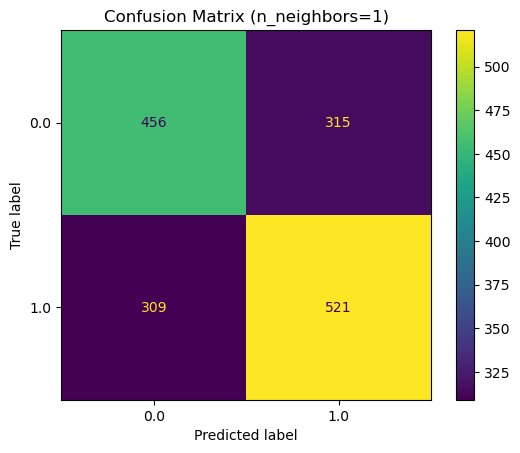

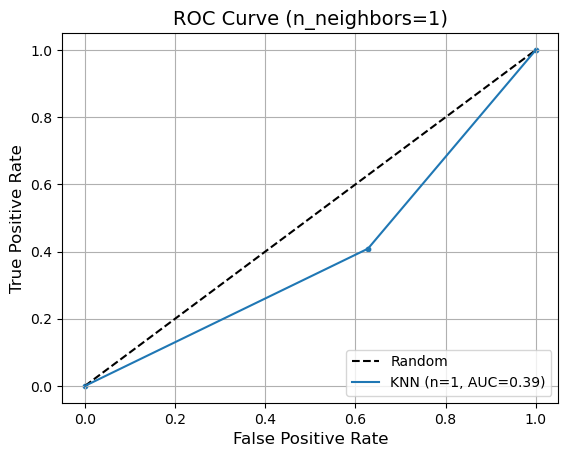

Confusion matrix for the high level (n_neighbors=5):
[[481 290]
 [228 602]]
Accuracy score is: 0.6764522173641474


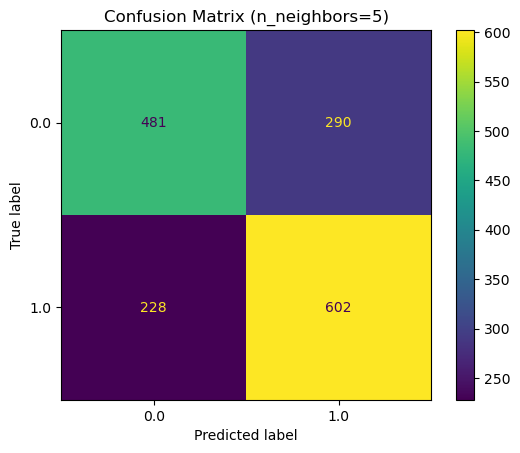

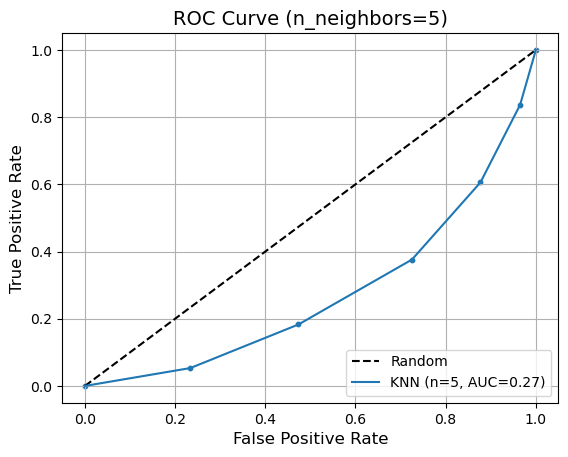

Confusion matrix for the high level (n_neighbors=10):
[[524 247]
 [277 553]]
Accuracy score is: 0.6727045596502186


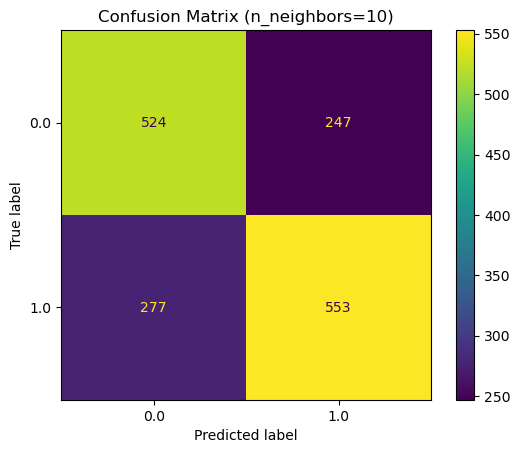

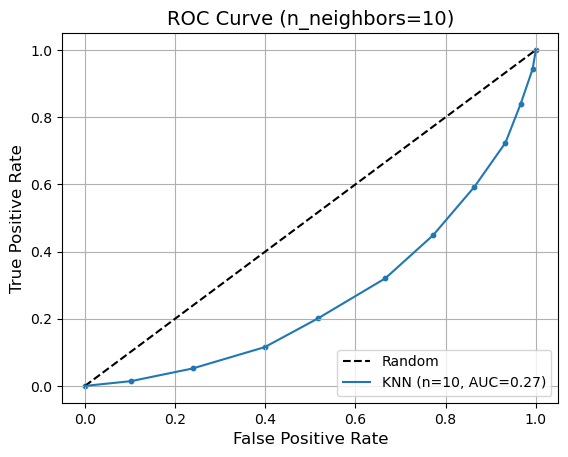

Confusion matrix for the high level (n_neighbors=20):
[[504 267]
 [256 574]]
Accuracy score is: 0.6733291692692067


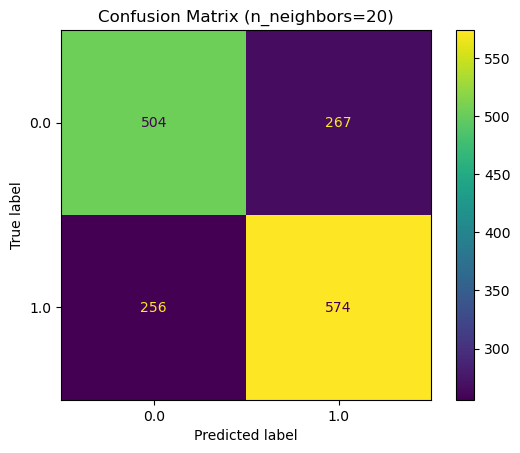

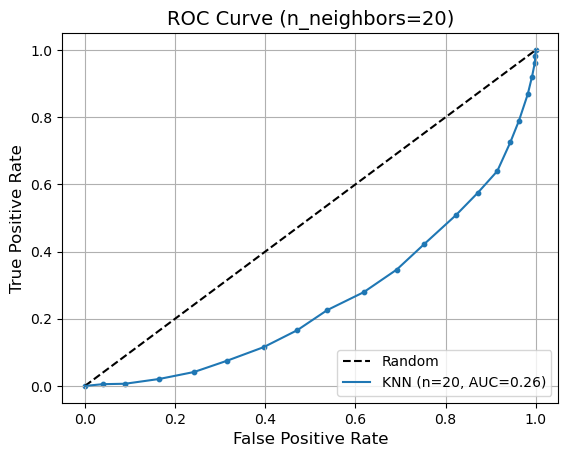

Confusion matrix for the high level (n_neighbors=50):
[[464 307]
 [215 615]]
Accuracy score is: 0.6739537788881949


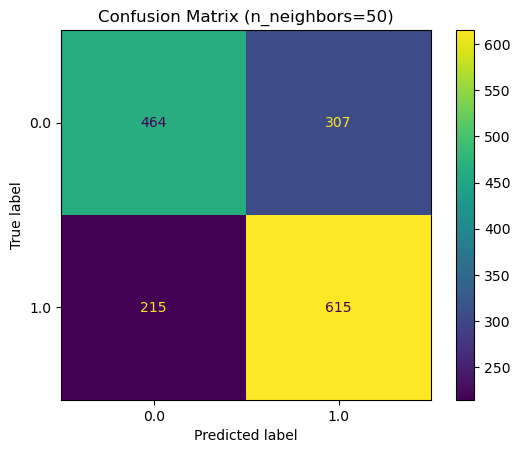

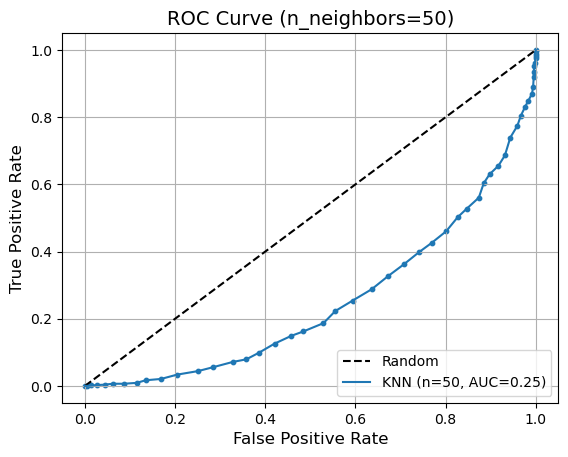

Confusion matrix for the high level (n_neighbors=100):
[[446 325]
 [196 634]]
Accuracy score is: 0.674578388507183


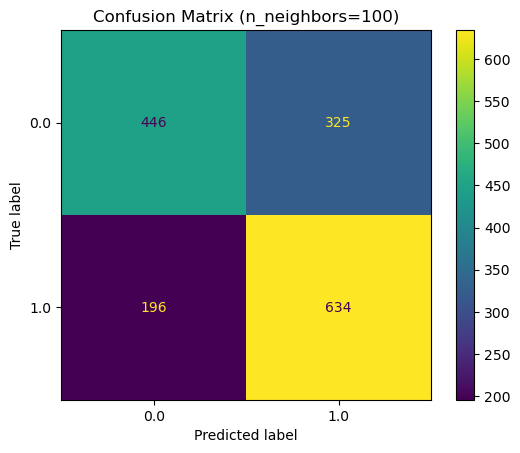

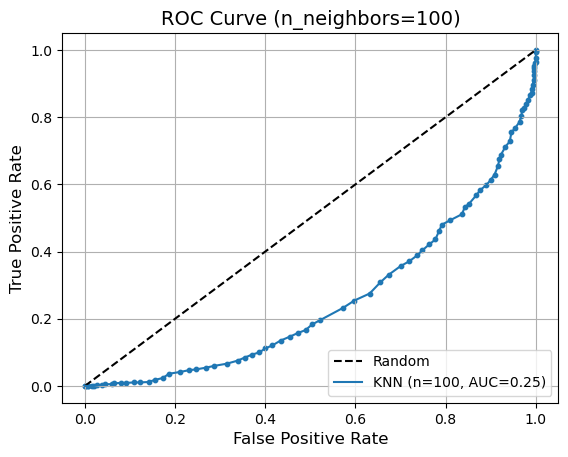

In [49]:

high_level_train, high_level_test, classification_train, classification_test = train_test_split(
    high_level, classification, test_size=0.20, random_state=42)   #splitting the data

    
scaler = StandardScaler()   #scaling the features
high_level_train_scaled = scaler.fit_transform(high_level_train)
high_level_test_scaled = scaler.transform(high_level_test)

n_neighbors = [1, 5, 10, 20, 50, 100]

for n in n_neighbors:
    
    classifier = KNeighborsClassifier(n_neighbors=n)
    classifier.fit(high_level_train_scaled, classification_train)

    high_level_test_pred = classifier.predict(high_level_test_scaled) #predicts and evaluates
    conf_matr = confusion_matrix(classification_test, high_level_test_pred)
    print(f'Confusion matrix for the high level (n_neighbors={n}):\n{conf_matr}')
    print(f'Accuracy score is: {accuracy_score(classification_test, high_level_test_pred)}')
    
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matr, display_labels=classifier.classes_)
    disp.plot()
    plt.title(f'Confusion Matrix (n_neighbors={n})')
    plt.show()

    # plotting the roc curve
    # Convert classification test to binary labels (0 and 1)
    y_true = pd.factorize(classification_test)[0]

    y_pred_prob_knn = classifier.predict_proba(high_level_test_scaled)

    
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob_knn[:, 1])
    auc_score = roc_auc_score(y_true, y_pred_prob_knn[:, 1])

    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.plot(fpr, tpr, label=f'KNN (n={n}, AUC={auc_score:.2f})')
    plt.scatter(fpr, tpr, s=10)
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title(f'ROC Curve (n_neighbors={n})', fontsize=14)
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

In [50]:
##